This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
image with region selection:


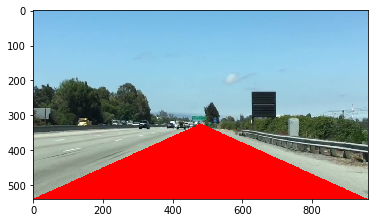

In [77]:
# adapted from udacity self-driving nanodegree:
# https://classroom.udacity.com/courses/ud013-preview/lessons/ca4dcf64-537a-49c7-9fbb-946c968174a9/concepts/c87c2a1c-c80e-4383-bf66-c1182ae91661

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print some stats
image = mpimg.imread('images/road.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# create a triangle as region of interest 
imheight, imwidth, channel = image.shape
triangle = {
    'left': [0, imheight - 1],
    'top': [imwidth//2, imheight*0.6],
    'right': [imwidth, imheight],
}

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((triangle['left'][0], triangle['top'][0]), (triangle['left'][1], triangle['top'][1]), 1)
fit_right = np.polyfit((triangle['right'][0], triangle['top'][0]), (triangle['right'][1], triangle['top'][1]), 1)
fit_bottom = np.polyfit((triangle['left'][0], triangle['right'][0]), (triangle['left'][1], triangle['right'][1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
print('image with region selection:')
plt.imshow(region_select)

# uncomment if plot does not display
plt.show()

original image → image with selection → masked image


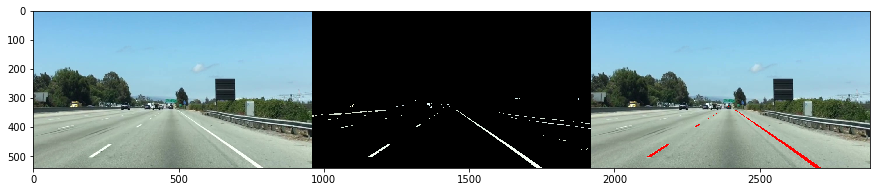

In [78]:
rgb_threshold = [200, 200, 200]
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])
        
# Mask color selection
color_select= np.copy(image)
color_select[color_thresholds] = [0,0,0]

# Find where image is both colored right and in the region
line_image = np.copy(image)
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]  # mask the region with red color


# adjust plot size
plt.rcParams['figure.figsize'] = [15, 15]

print('original image → image with selection → masked image')
plt.imshow(np.hstack([image, color_select, line_image]))
plt.show()